Loading MNIST dataset from CSV...
Training data shape: (5000, 784)
Test data shape: (1000, 784)

Performing PCA from scratch...
PCA done in 1.81 seconds
Explained variance ratio: [0.06082145 0.04375789]


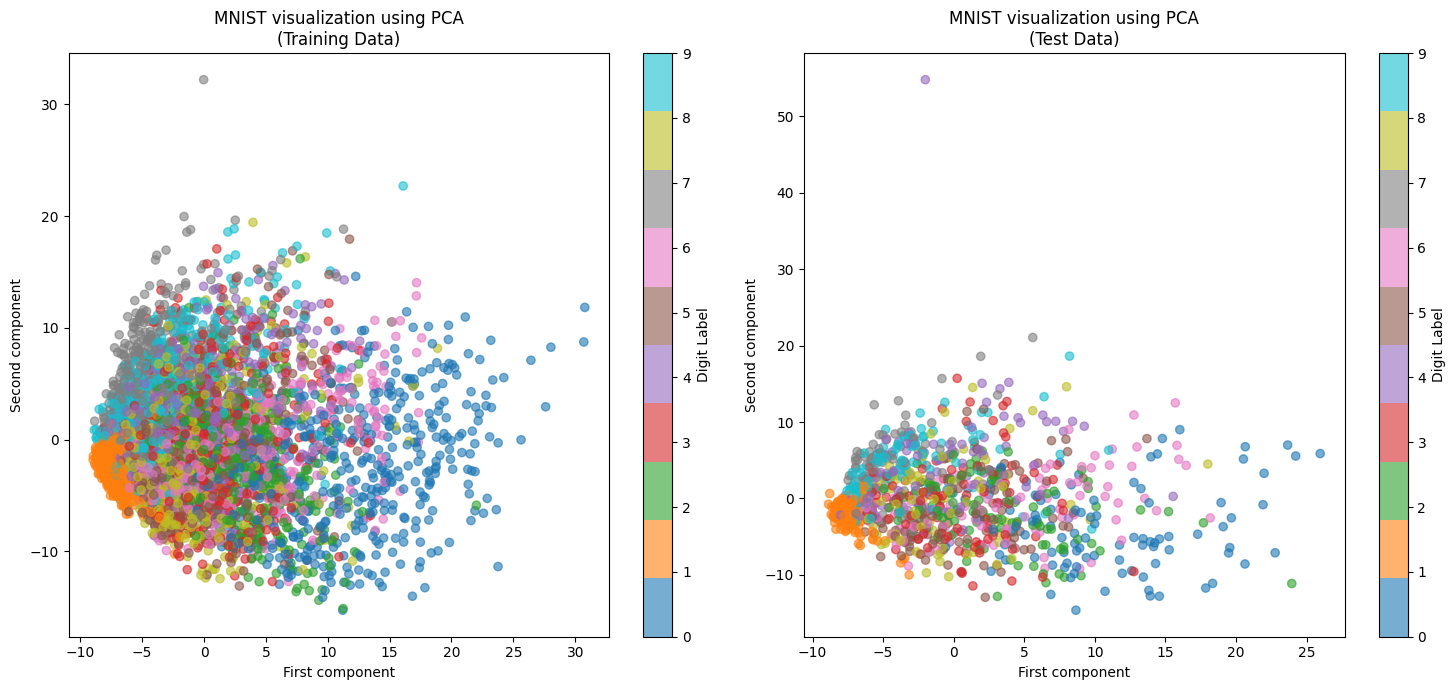


Performing t-SNE with perplexity=30, learning_rate=200...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE done in 74.69 seconds


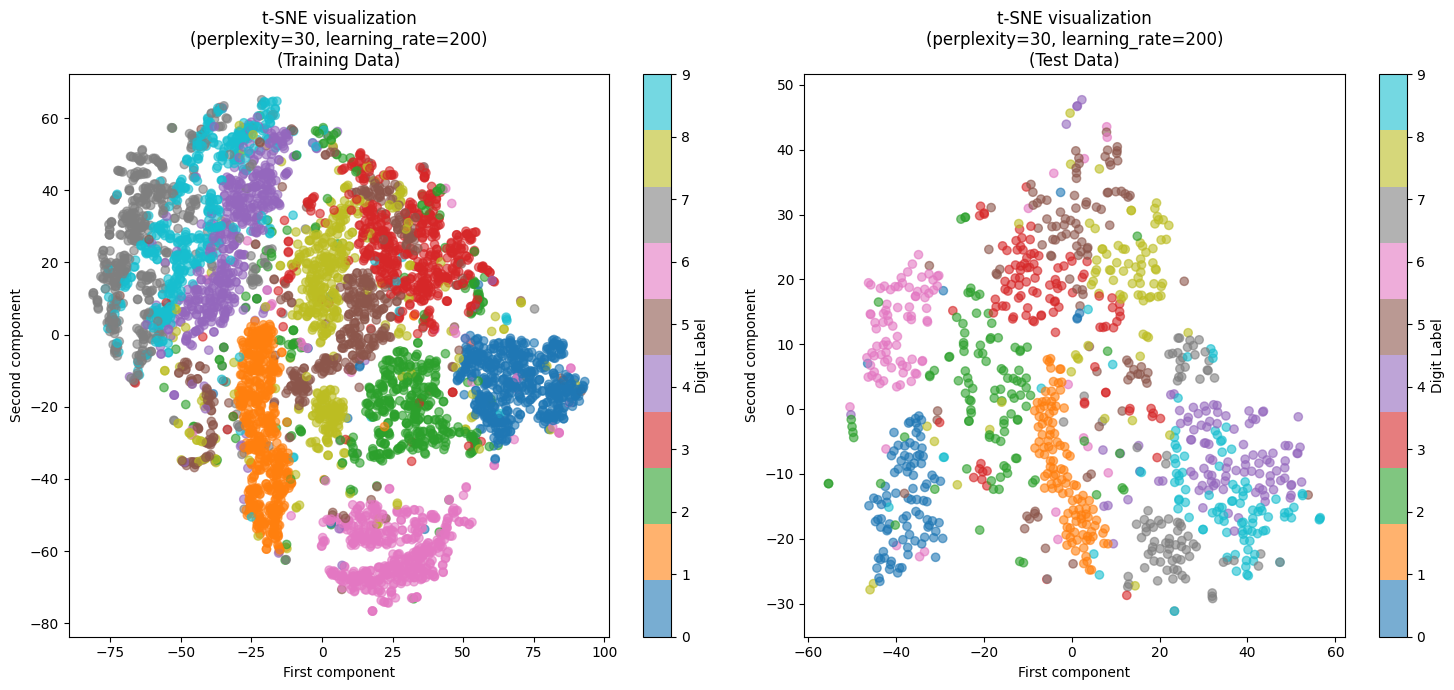


Performing t-SNE with perplexity=30, learning_rate=1000...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE done in 74.03 seconds


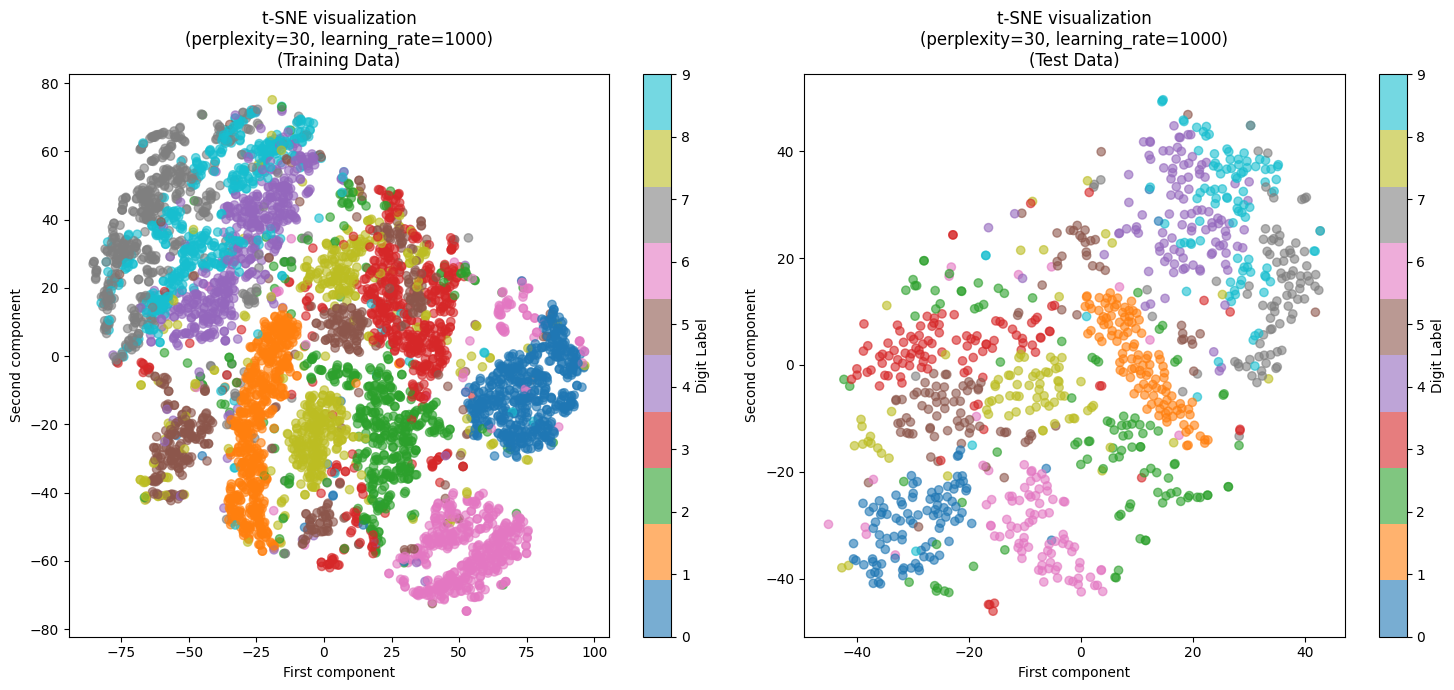


Performing t-SNE with perplexity=50, learning_rate=200...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE done in 76.75 seconds


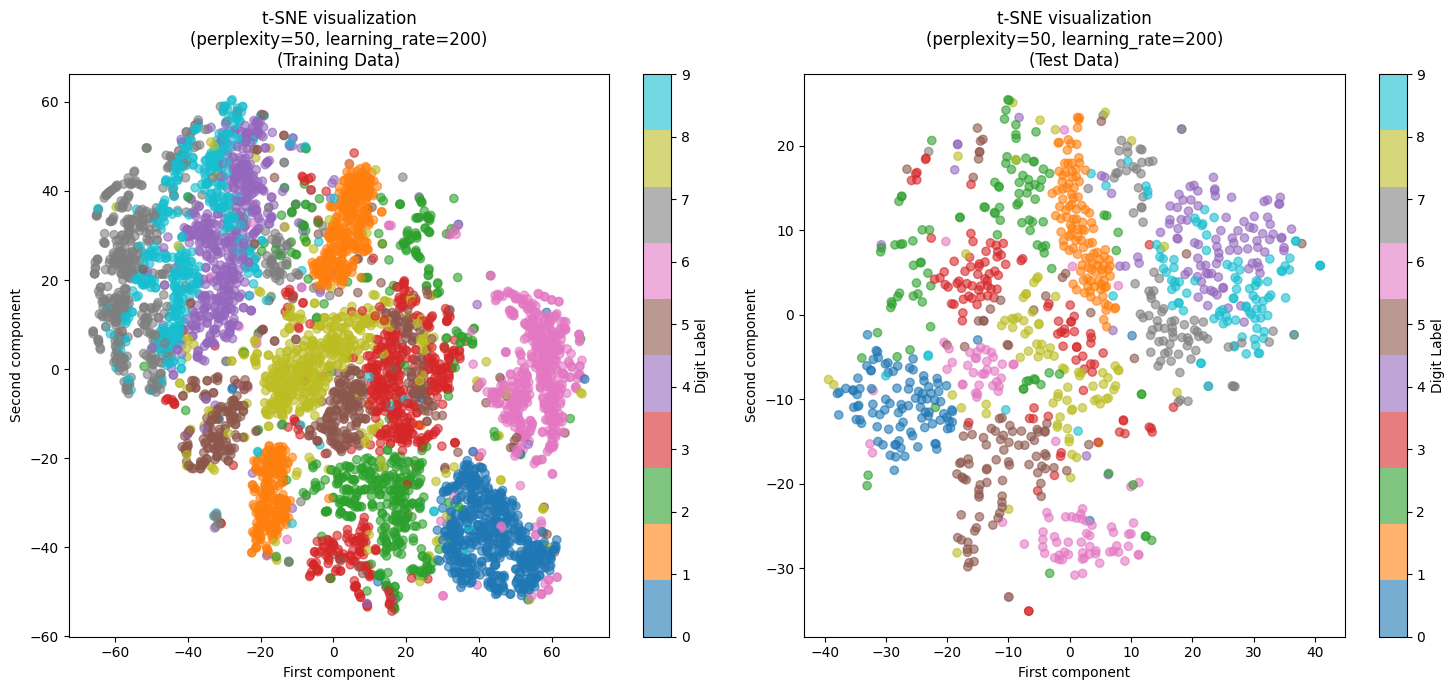


Performing t-SNE with perplexity=50, learning_rate=1000...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE done in 95.35 seconds


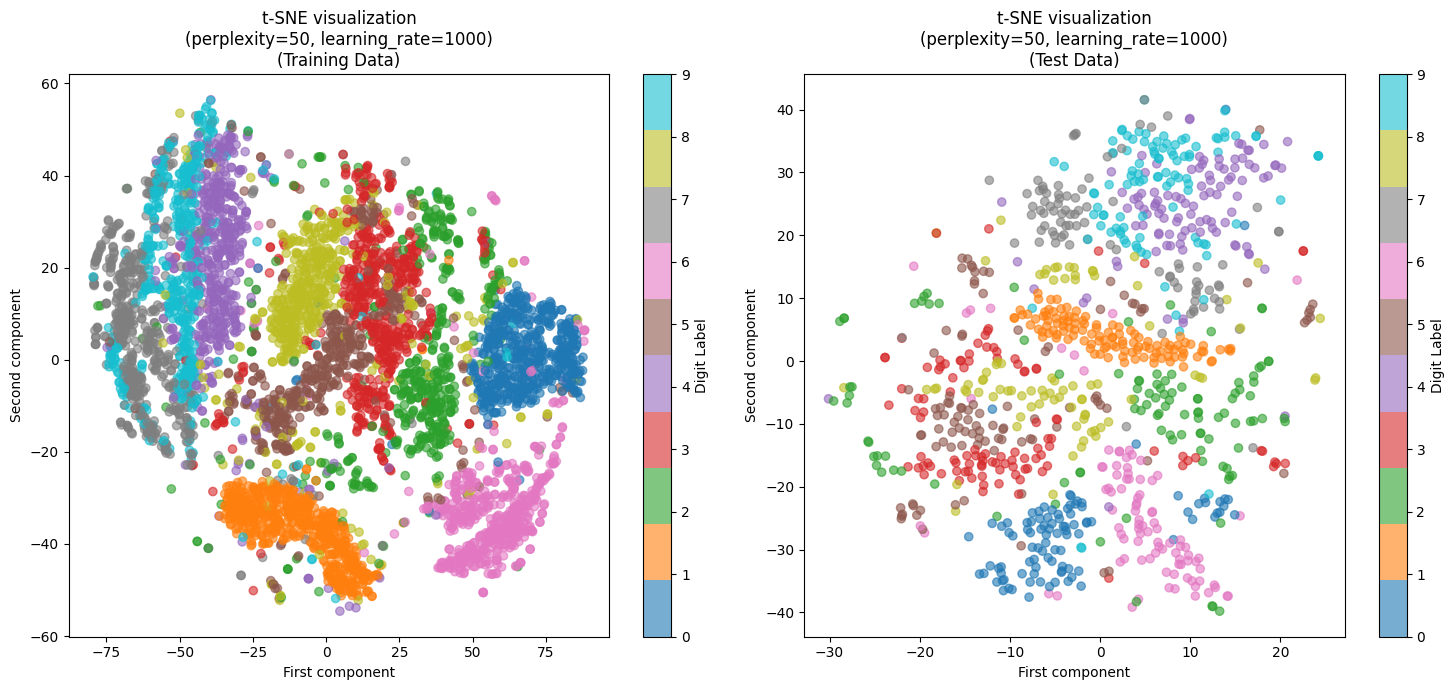


Comprehensive Comparison:

PCA Results:
Time taken: 1.81 seconds
Training Silhouette Score: -0.055
Test Silhouette Score: -0.059
Explained Variance Ratio: [0.06082145 0.04375789]

t-SNE Results:

Parameters: perplexity=30, learning_rate=200
Time taken: 74.69 seconds
Training Silhouette Score: 0.183
Test Silhouette Score: 0.127

Parameters: perplexity=30, learning_rate=1000
Time taken: 74.03 seconds
Training Silhouette Score: 0.125
Test Silhouette Score: 0.103

Parameters: perplexity=50, learning_rate=200
Time taken: 76.75 seconds
Training Silhouette Score: 0.104
Test Silhouette Score: 0.079

Parameters: perplexity=50, learning_rate=1000
Time taken: 95.35 seconds
Training Silhouette Score: 0.176
Test Silhouette Score: 0.020

    Analysis Summary:
    1. PCA:
       - Faster computation
       - Linear projection maintains consistency between train and test
       - Shows global structure but less separation between digits
       - More interpretable through explained variance ratio

  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from time import time

def load_mnist_data(train_path='train.csv', test_path='mnist_test.csv', n_samples=None):
    print("Loading MNIST dataset from CSV...")

    # Read both train and test CSV files
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Separate features and labels for training data
    y_train = train_df['label'].values
    X_train = train_df.drop('label', axis=1).values

    # Separate features and labels for test data
    y_test = test_df['label'].values
    X_test = test_df.drop('label', axis=1).values

    # Take subsets if specified
    if n_samples and n_samples < len(X_train):
        rng = np.random.RandomState(42)
        train_indices = rng.choice(X_train.shape[0], n_samples, replace=False)
        X_train = X_train[train_indices]
        y_train = y_train[train_indices]

        test_indices = rng.choice(X_test.shape[0], n_samples//5, replace=False)
        X_test = X_test[test_indices]
        y_test = y_test[test_indices]

    # Scale both training and test data using the same scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)  # Use same scaling parameters as training

    return X_train_scaled, y_train, X_test_scaled, y_test

class PCAFromScratch:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Compute covariance matrix
        cov_matrix = np.cov(X_centered.T)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvalues and eigenvectors in descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Calculate explained variance ratio
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = eigenvalues / total_variance

        # Store top n_components eigenvectors
        self.components = eigenvectors[:, :self.n_components]

        return self

    def transform(self, X):
        # Center the data using training mean
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

def visualize_projection(X_2d_train, y_train, X_2d_test, y_test, title, filename=None):
    plt.figure(figsize=(15, 7))

    # Plot training data
    plt.subplot(121)
    scatter_train = plt.scatter(X_2d_train[:, 0], X_2d_train[:, 1],
                              c=y_train.astype(int), cmap='tab10',
                              alpha=0.6, label='Train')
    plt.colorbar(scatter_train, label='Digit Label')
    plt.title(f'{title}\n(Training Data)')
    plt.xlabel('First component')
    plt.ylabel('Second component')

    # Plot test data
    plt.subplot(122)
    scatter_test = plt.scatter(X_2d_test[:, 0], X_2d_test[:, 1],
                             c=y_test.astype(int), cmap='tab10',
                             alpha=0.6, label='Test')
    plt.colorbar(scatter_test, label='Digit Label')
    plt.title(f'{title}\n(Test Data)')
    plt.xlabel('First component')
    plt.ylabel('Second component')

    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

def calculate_cluster_metrics(X_2d, y):
    """Calculate simple cluster separation metrics"""
    from sklearn.metrics import silhouette_score
    try:
        silhouette = silhouette_score(X_2d, y)
    except:
        silhouette = None
    return silhouette

if __name__ == "__main__":
    # 1. Load and preprocess both training and test data
    X_train, y_train, X_test, y_test = load_mnist_data(n_samples=5000)
    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")

    # 2. PCA from scratch
    print("\nPerforming PCA from scratch...")
    t0 = time()
    pca_scratch = PCAFromScratch(n_components=2)
    X_train_pca = pca_scratch.fit_transform(X_train)
    X_test_pca = pca_scratch.transform(X_test)
    pca_time = time() - t0
    print(f"PCA done in {pca_time:.2f} seconds")
    print(f"Explained variance ratio: {pca_scratch.explained_variance_ratio_[:2]}")

    # Visualize PCA results
    visualize_projection(X_train_pca, y_train, X_test_pca, y_test,
                        'MNIST visualization using PCA',
                        'pca_visualization_train_test.png')

    # Calculate and store metrics for PCA
    pca_train_silhouette = calculate_cluster_metrics(X_train_pca, y_train)
    pca_test_silhouette = calculate_cluster_metrics(X_test_pca, y_test)

    # 4. t-SNE with different parameters
    tsne_results = []
    perplexity_values = [30, 50]
    learning_rates = [200, 1000]

    for perplexity in perplexity_values:
        for learning_rate in learning_rates:
            print(f"\nPerforming t-SNE with perplexity={perplexity}, "
                  f"learning_rate={learning_rate}...")

            # Fit t-SNE on training data
            t0 = time()
            tsne = TSNE(n_components=2, perplexity=perplexity,
                       learning_rate=learning_rate, n_iter=1000,
                       random_state=42)
            X_train_tsne = tsne.fit_transform(X_train)

            # Transform test data using the same t-SNE model
            # Note: t-SNE doesn't have a direct transform method, so we'll fit a new model
            X_test_tsne = TSNE(n_components=2, perplexity=perplexity,
                              learning_rate=learning_rate, n_iter=1000,
                              random_state=42).fit_transform(X_test)

            tsne_time = time() - t0
            print(f"t-SNE done in {tsne_time:.2f} seconds")

            # Calculate metrics
            train_silhouette = calculate_cluster_metrics(X_train_tsne, y_train)
            test_silhouette = calculate_cluster_metrics(X_test_tsne, y_test)

            # Store results
            tsne_results.append({
                'perplexity': perplexity,
                'learning_rate': learning_rate,
                'train_silhouette': train_silhouette,
                'test_silhouette': test_silhouette,
                'time': tsne_time
            })

            # Visualize results
            visualize_projection(X_train_tsne, y_train, X_test_tsne, y_test,
                               f't-SNE visualization\n(perplexity={perplexity}, '
                               f'learning_rate={learning_rate})',
                               f'tsne_p{perplexity}_lr{learning_rate}_train_test.png')

    # Print comprehensive comparison
    print("\nComprehensive Comparison:")
    print("\nPCA Results:")
    print(f"Time taken: {pca_time:.2f} seconds")
    print(f"Training Silhouette Score: {pca_train_silhouette:.3f}")
    print(f"Test Silhouette Score: {pca_test_silhouette:.3f}")
    print(f"Explained Variance Ratio: {pca_scratch.explained_variance_ratio_[:2]}")

    print("\nt-SNE Results:")
    for result in tsne_results:
        print(f"\nParameters: perplexity={result['perplexity']}, "
              f"learning_rate={result['learning_rate']}")
        print(f"Time taken: {result['time']:.2f} seconds")
        print(f"Training Silhouette Score: {result['train_silhouette']:.3f}")
        print(f"Test Silhouette Score: {result['test_silhouette']:.3f}")

    print("""
    Analysis Summary:
    1. PCA:
       - Faster computation
       - Linear projection maintains consistency between train and test
       - Shows global structure but less separation between digits
       - More interpretable through explained variance ratio

    2. t-SNE:
       - Better cluster separation in most cases
       - More computationally intensive
       - Results vary with hyperparameters
       - Test set projections may differ significantly from training

    3. Recommendations:
       - Use PCA when:
         * Speed is important
         * Global structure preservation is needed
         * Interpretability is crucial

       - Use t-SNE when:
         * Better cluster visualization is needed
         * Computational time is not a constraint
         * Local structure preservation is important
    """)

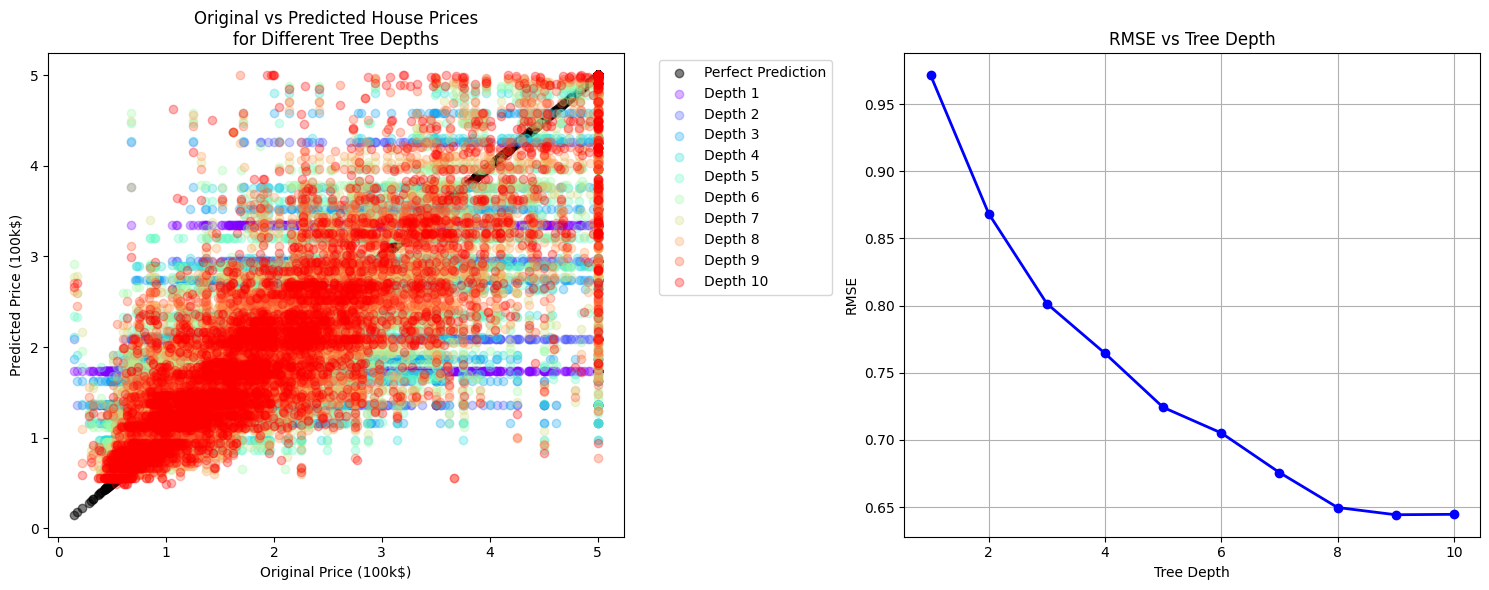


RMSE scores for different tree depths:
Depth 1: 0.9717
Depth 2: 0.8685
Depth 3: 0.8015
Depth 4: 0.7645
Depth 5: 0.7242
Depth 6: 0.7052
Depth 7: 0.6757
Depth 8: 0.6497
Depth 9: 0.6443
Depth 10: 0.6446

Optimal tree depth: 9
Minimum RMSE: 0.6443

Feature Importance:
      Feature  Importance
0      MedInc    0.631555
5    AveOccup    0.131729
6    Latitude    0.075473
7   Longitude    0.058643
1    HouseAge    0.043700
2    AveRooms    0.036752
4  Population    0.011276
3   AveBedrms    0.010872
